In [2]:
# Experiment 5: Clustering on Drug Interaction Data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
# Replace with your dataset
df = pd.read_csv("drug_interactions_500.csv")

# Display basic info
print(df.head())

# --- Data Preprocessing ---
# Remove non-numeric columns
X = df.select_dtypes(include=[np.number])
X_scaled = StandardScaler().fit_transform(X)

# --- 1. K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# --- 2. Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# --- 3. Hierarchical Clustering ---
hier = AgglomerativeClustering(n_clusters=3)
df['Hier_Cluster'] = hier.fit_predict(X_scaled)

# --- Visualization ---
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['GMM_Cluster'], palette='coolwarm')
plt.title('Gaussian Mixture Clustering')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['Hier_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

# --- Comparison ---
print(df.groupby('KMeans_Cluster').mean())


        Drug1         Drug2                 Interaction
0   Ibuprofen    Amiodarone          Reduced absorption
1  Lisinopril  Contrast Dye           Enhanced sedation
2   Metformin    Omeprazole      Increased serum levels
3     Digoxin     Metformin           Enhanced sedation
4    Warfarin    Lisinopril  Increased digoxin toxicity


ValueError: at least one array or dtype is required

Dataset Loaded Successfully!
        Drug1         Drug2                 Interaction
0   Ibuprofen    Amiodarone          Reduced absorption
1  Lisinopril  Contrast Dye           Enhanced sedation
2   Metformin    Omeprazole      Increased serum levels
3     Digoxin     Metformin           Enhanced sedation
4    Warfarin    Lisinopril  Increased digoxin toxicity

Explained Variance Ratio:
[0.37163454 0.31788395]


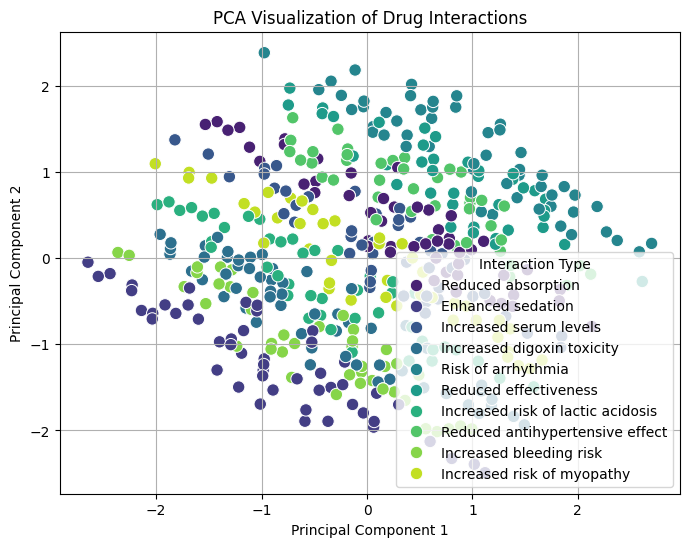


Transformed PCA data saved as 'drug_interaction_PCA_output.csv'


In [3]:
# Experiment 6: PCA on drug_interaction_500.csv
# ---------------------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
df = pd.read_csv("drug_interactions_500.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# --- Step 2: Encode Categorical Columns ---
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df['Drug1_encoded'] = le1.fit_transform(df['Drug1'])
df['Drug2_encoded'] = le2.fit_transform(df['Drug2'])
df['Interaction_encoded'] = le3.fit_transform(df['Interaction'])

# --- Step 3: Feature Selection ---
X = df[['Drug1_encoded', 'Drug2_encoded', 'Interaction_encoded']]

# --- Step 4: Standardize the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Apply PCA ---
pca = PCA(n_components=2)   # reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Add principal components to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# --- Step 6: Display Explained Variance ---
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# --- Step 7: Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Interaction', data=df, palette='viridis', s=80)
plt.title('PCA Visualization of Drug Interactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Interaction Type')
plt.grid(True)
plt.show()

# --- Step 8: Save Transformed Data (Optional) ---
df.to_csv("drug_interaction_PCA_output.csv", index=False)
print("\nTransformed PCA data saved as 'drug_interaction_PCA_output.csv'")


Dataset Loaded Successfully!
        Drug1         Drug2                 Interaction
0   Ibuprofen    Amiodarone          Reduced absorption
1  Lisinopril  Contrast Dye           Enhanced sedation
2   Metformin    Omeprazole      Increased serum levels
3     Digoxin     Metformin           Enhanced sedation
4    Warfarin    Lisinopril  Increased digoxin toxicity


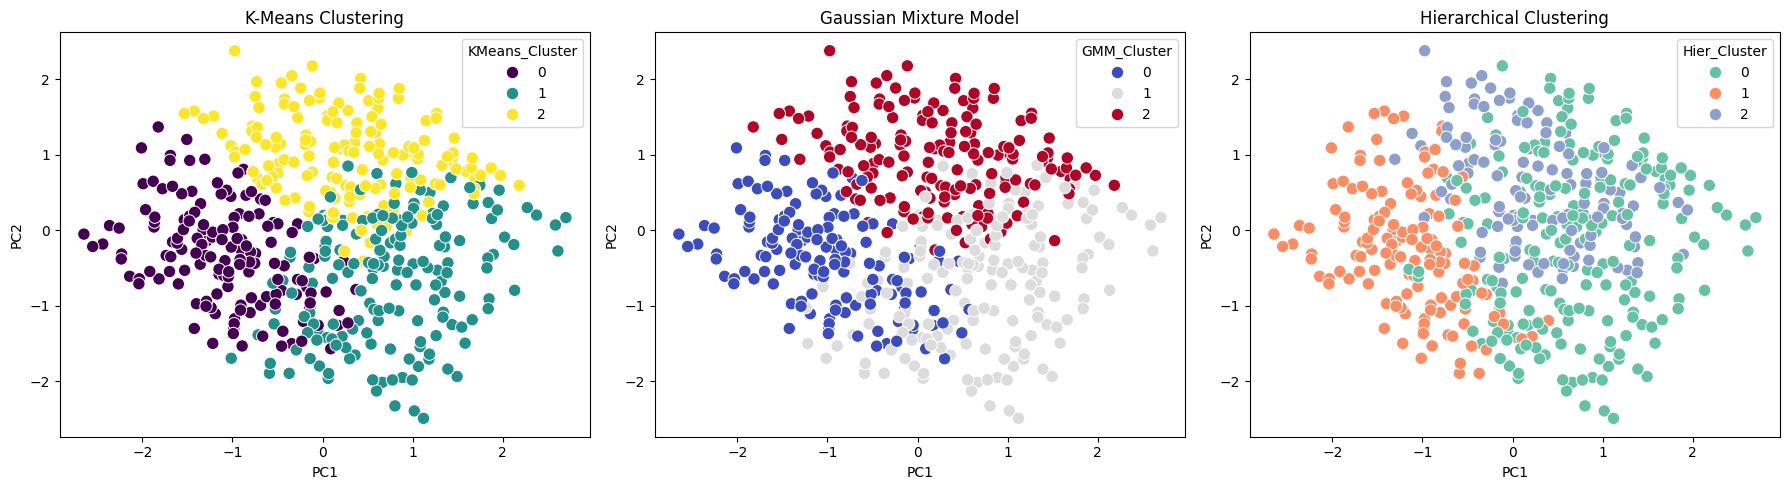


K-Means Cluster Counts:
 KMeans_Cluster
1    172
2    166
0    162
Name: count, dtype: int64

GMM Cluster Counts:
 GMM_Cluster
2    176
1    169
0    155
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hier_Cluster
0    221
1    151
2    128
Name: count, dtype: int64

Clustered data saved as 'drug_interaction_clustered.csv'


In [5]:
# Experiment 5: Clustering Drug Interaction Data
# ---------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load dataset ---
df = pd.read_csv("drug_interactions_500.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# --- Step 2: Encode categorical columns ---
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df['Drug1_encoded'] = le1.fit_transform(df['Drug1'])
df['Drug2_encoded'] = le2.fit_transform(df['Drug2'])
df['Interaction_encoded'] = le3.fit_transform(df['Interaction'])

# --- Step 3: Feature selection and scaling ---
X = df[['Drug1_encoded', 'Drug2_encoded', 'Interaction_encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 5: Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# --- Step 6: Hierarchical Clustering ---
hier = AgglomerativeClustering(n_clusters=3)
df['Hier_Cluster'] = hier.fit_predict(X_scaled)

# --- Step 7: Reduce to 2D for visualization using PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

# --- Step 8: Visualization ---
plt.figure(figsize=(18,5))

# K-Means Plot
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df, palette='viridis', s=80)
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# GMM Plot
plt.subplot(1,3,2)
sns.scatterplot(x='PC1', y='PC2', hue='GMM_Cluster', data=df, palette='coolwarm', s=80)
plt.title('Gaussian Mixture Model')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Hierarchical Clustering Plot
plt.subplot(1,3,3)
sns.scatterplot(x='PC1', y='PC2', hue='Hier_Cluster', data=df, palette='Set2', s=80)
plt.title('Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# --- Step 9: Cluster Summary ---
print("\nK-Means Cluster Counts:\n", df['KMeans_Cluster'].value_counts())
print("\nGMM Cluster Counts:\n", df['GMM_Cluster'].value_counts())
print("\nHierarchical Cluster Counts:\n", df['Hier_Cluster'].value_counts())

# --- Step 10: Save clustered dataset ---
df.to_csv("drug_interaction_clustered.csv", index=False)
print("\nClustered data saved as 'drug_interaction_clustered.csv'")


In [6]:
pip install hmmlearn


   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/127.0 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/127.0 kB 262.6 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/127.0 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- 127.0/127.0 kB 621.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\renu_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Experiment 7: Hidden Markov Model for Sequential Data
# -----------------------------------------------------

import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Load sequential data ---
# Example: sequence of drug interactions (categorical)
# Here, we'll use a sample sequence
sequence = ['Minor', 'Minor', 'Moderate', 'Major', 'Major', 'Moderate', 'Minor', 'Major', 'Moderate', 'Minor']

# Encode categorical sequence numerically
le = LabelEncoder()
sequence_encoded = le.fit_transform(sequence)
sequence_encoded = sequence_encoded.reshape(-1,1)

# --- Step 2: Define HMM ---
# We assume 2 hidden states (can tune based on dataset)
model = hmm.MultinomialHMM(n_components=2, n_iter=100, random_state=42)
model.fit(sequence_encoded)

# --- Step 3: Predict hidden states for existing sequence ---
hidden_states = model.predict(sequence_encoded)
print("\nHidden States Sequence:\n", hidden_states)

# --- Step 4: Predict next possible observation ---
# Generate the next 5 predicted observations
next_obs, _ = model.sample(5)
next_obs_decoded = le.inverse_transform(next_obs.flatten())
print("\nPredicted Next Observations:", next_obs_decoded)

# --- Step 5: Transition & Emission Probabilities ---
print("\nTransition Matrix:\n", model.transmat_)
print("\nEmission Probabilities:\n", model.emissionprob_)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Hidden States Sequence:
 [1 0 0 0 0 0 0 0 0 0]


ValueError: For sampling, a single n_trials must be given

In [8]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# Example categorical sequence
sequence = ['Minor', 'Minor', 'Moderate', 'Major', 'Major', 'Moderate', 'Minor', 'Major', 'Moderate', 'Minor']

# Encode categorical sequence
le = LabelEncoder()
sequence_encoded = le.fit_transform(sequence)
sequence_encoded = sequence_encoded.reshape(-1, 1)  # must be 2D array

# Define HMM
model = hmm.MultinomialHMM(n_components=2, n_iter=100, random_state=42)
model.fit(sequence_encoded)

# Predict hidden states
hidden_states = model.predict(sequence_encoded)
print("Hidden States Sequence:\n", hidden_states)

# Predict next 5 observations (must specify n_samples)
next_obs, _ = model.sample(n_samples=5)
next_obs_decoded = le.inverse_transform(next_obs.flatten())
print("Predicted Next Observations:", next_obs_decoded)

# Transition & Emission Matrices
print("\nTransition Matrix:\n", model.transmat_)
print("\nEmission Probabilities:\n", model.emissionprob_)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Hidden States Sequence:
 [1 0 0 0 0 0 0 0 0 0]


ValueError: For sampling, a single n_trials must be given

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm

# --- Step 1: Load dataset ---
df = pd.read_csv("drug_interactions_500.csv")

# Example: let's take interactions of a single drug sequence
# Here, we'll just use the first 20 interaction records as a sequence
sequence = df['Interaction'][:20].values

# --- Step 2: Encode interaction types ---
le = LabelEncoder()
sequence_encoded = le.fit_transform(sequence).reshape(-1,1)  # Must be 2D

# --- Step 3: Define HMM ---
model = hmm.MultinomialHMM(n_components=2, n_iter=100, random_state=42)
model.fit(sequence_encoded)

# --- Step 4: Predict hidden states ---
hidden_states = model.predict(sequence_encoded)
print("Hidden States Sequence:\n", hidden_states)

# --- Step 5: Predict next 5 interactions ---
next_obs, _ = model.sample(n_samples=5)
next_obs_decoded = le.inverse_transform(next_obs.flatten())
print("Predicted Next Interactions:", next_obs_decoded)

# --- Step 6: Transition & Emission Probabilities ---
print("\nTransition Matrix:\n", model.transmat_)
print("\nEmission Probabilities:\n", model.emissionprob_)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Hidden States Sequence:
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: For sampling, a single n_trials must be given

Dataset Loaded Successfully!
        Drug1         Drug2                 Interaction
0   Ibuprofen    Amiodarone          Reduced absorption
1  Lisinopril  Contrast Dye           Enhanced sedation
2   Metformin    Omeprazole      Increased serum levels
3     Digoxin     Metformin           Enhanced sedation
4    Warfarin    Lisinopril  Increased digoxin toxicity

Classification Accuracy: 9.00%


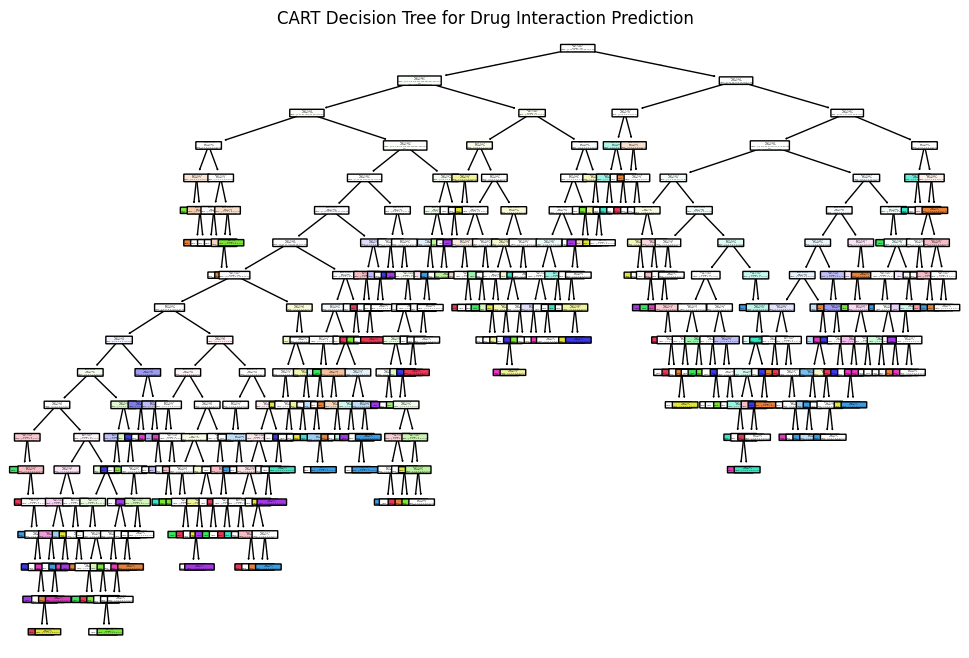


Decision Tree Rules:
 |--- Drug1 <= 12.50
|   |--- Drug2 <= 15.50
|   |   |--- Drug1 <= 0.50
|   |   |   |--- Drug2 <= 7.50
|   |   |   |   |--- Drug2 <= 1.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Drug2 >  1.50
|   |   |   |   |   |--- Drug2 <= 5.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Drug2 >  5.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Drug2 >  7.50
|   |   |   |   |--- Drug2 <= 11.50
|   |   |   |   |   |--- Drug2 <= 10.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Drug2 >  10.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Drug2 >  11.50
|   |   |   |   |   |--- Drug2 <= 13.50
|   |   |   |   |   |   |--- Drug2 <= 12.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Drug2 >  12.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Drug2 >  13.50
|   |   |   |   |   |   |--- class: 2
|   |   |--- Drug1 >  0.50
|   |   |   |--- Drug2 <= 14.50
|   |   |

In [13]:
# Experiment 8: CART Decision Tree for Drug Interaction Prediction
# -----------------------------------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# --- Step 1: Load Dataset ---
df = pd.read_csv("drug_interactions_500.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# --- Step 2: Encode Categorical Variables ---
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df['Drug1_encoded'] = le1.fit_transform(df['Drug1'])
df['Drug2_encoded'] = le2.fit_transform(df['Drug2'])
df['Interaction_encoded'] = le3.fit_transform(df['Interaction'])

# Features and target
X = df[['Drug1_encoded', 'Drug2_encoded']]
y = df['Interaction_encoded']

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Create Decision Tree Classifier ---
# Using CART (criterion='gini')
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# --- Step 5: Predictions ---
y_pred = clf.predict(X_test)

# --- Step 6: Evaluate Accuracy ---
accuracy = clf.score(X_test, y_test)
print(f"\nClassification Accuracy: {accuracy*100:.2f}%")

# --- Step 7: Visualize Tree ---
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['Drug1', 'Drug2'], class_names=le3.classes_, filled=True, rounded=True)
plt.title("CART Decision Tree for Drug Interaction Prediction")
plt.show()

# --- Step 8: Print Textual Tree Representation ---
tree_rules = export_text(clf, feature_names=['Drug1', 'Drug2'])
print("\nDecision Tree Rules:\n", tree_rules)


In [14]:
# Experiment 9: Ensemble Learning for Drug Interaction Classification
# ----------------------------------------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load Dataset ---
df = pd.read_csv("drug_interactions_500.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# --- Step 2: Encode Categorical Features ---
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df['Drug1_encoded'] = le1.fit_transform(df['Drug1'])
df['Drug2_encoded'] = le2.fit_transform(df['Drug2'])
df['Interaction_encoded'] = le3.fit_transform(df['Interaction'])

# Features and target
X = df[['Drug1_encoded', 'Drug2_encoded']]
y = df['Interaction_encoded']

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le3.classes_))

# --- Step 5: Bagging Classifier ---
bag = BaggingClassifier(n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("\nBagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag, target_names=le3.classes_))

# --- Step 6: AdaBoost Classifier ---
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada, target_names=le3.classes_))


Dataset Loaded Successfully!
        Drug1         Drug2                 Interaction
0   Ibuprofen    Amiodarone          Reduced absorption
1  Lisinopril  Contrast Dye           Enhanced sedation
2   Metformin    Omeprazole      Increased serum levels
3     Digoxin     Metformin           Enhanced sedation
4    Warfarin    Lisinopril  Increased digoxin toxicity

Random Forest Accuracy: 0.09
                                   precision    recall  f1-score   support

                Enhanced sedation       0.19      0.23      0.21        13
          Increased bleeding risk       0.08      0.17      0.11         6
       Increased digoxin toxicity       0.17      0.08      0.11        13
Increased risk of lactic acidosis       0.20      0.08      0.12        12
       Increased risk of myopathy       0.09      0.17      0.12         6
           Increased serum levels       0.00      0.00      0.00         6
               Reduced absorption       0.00      0.00      0.00        13
  Re

C:\Users\renu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\renu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\renu_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Load dataset ---
df = pd.read_csv("drug_interactions_500.csv")
df = df.dropna()

# --- Step 2: Select interaction sequence ---
# For simplicity, take all interactions as a single sequence
sequence = df['Interaction'].values

# Encode categorical interaction types
le = LabelEncoder()
sequence_encoded = le.fit_transform(sequence).reshape(-1, 1)  # Must be 2D for HMM

# --- Step 3: Define HMM ---
n_states = 3  # Number of hidden states
model = hmm.MultinomialHMM(n_components=n_states, random_state=42, n_iter=200, tol=1e-4)

# Optional: initialize start, transition, and emission probabilities
model.startprob_ = np.array([1/3, 1/3, 1/3])
model.transmat_ = np.array([
    [0.85, 0.10, 0.05],
    [0.10, 0.80, 0.10],
    [0.05, 0.10, 0.85]
])
model.emissionprob_ = np.array([
    [0.80, 0.15, 0.05],
    [0.05, 0.80, 0.15],
    [0.05, 0.15, 0.80]
])

# --- Step 4: Fit HMM ---
model.fit(sequence_encoded)

# --- Step 5: Decode hidden states ---
logprob, states = model.decode(sequence_encoded, algorithm="viterbi")
print("Log-likelihood:", logprob)
print("First 40 inferred states:", states[:40])

# --- Step 6: Print transition & emission matrices ---
print("\nTransition Matrix:")
for i, row in enumerate(model.transmat_):
    formatted_row = [f"{val:.2f}" for val in row]
    print(f"[{', '.join(formatted_row)}]")

print("\nEmission Probabilities:")
for i, row in enumerate(model.emissionprob_):
    formatted_row = [f"{val:.2f}" for val in row]
    print(f"[{', '.join(formatted_row)}]")

# --- Step 7: Save results to text file ---
with open("exp07_hmm_drug_interactions.txt", "w") as f:
    f.write("Log-likelihood: " + str(logprob) + "\n")
    f.write("States:\n")
    f.write(" ".join(map(str, states)) + "\n")

# --- Step 8: Plot observations vs inferred states ---
t = np.arange(len(sequence_encoded))
plt.figure(figsize=(12, 3.5))
plt.step(t, sequence_encoded.flatten(), where="mid", label="Observations (Minor/Moderate/Major)")
plt.step(t, states, where="mid", label="Inferred Hidden States", alpha=0.9)
plt.yticks([0, 1, 2], le.inverse_transform([0, 1, 2]))
plt.xlabel("Time")
plt.title("HMM - Drug Interactions Observations vs Hidden States")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("exp07_hmm_drug_interactions_plot.png", dpi=150)
plt.close()


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Log-likelihood: -11.970586067939383
First 40 inferred states: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0]

Transition Matrix:
[0.00, 1.00, 0.00]
[0.95, 0.01, 0.04]
[0.40, 0.12, 0.47]

Emission Probabilities:
[1.00]
[1.00]
[1.00]


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Log-likelihood: -11.970586067939383
First 40 inferred states: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0]


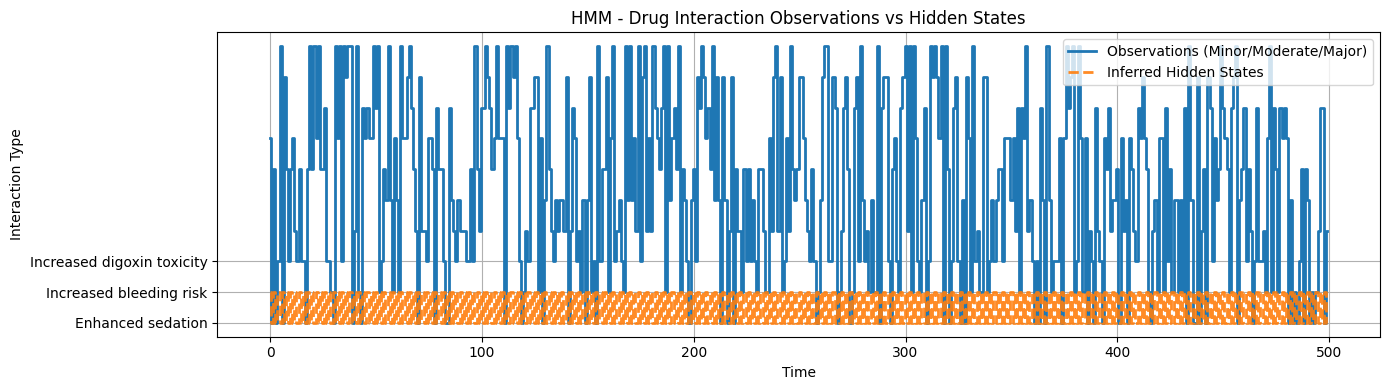

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Load dataset ---
df = pd.read_csv("drug_interactions_500.csv")
df = df.dropna()

# --- Step 2: Select interaction sequence ---
sequence = df['Interaction'].values

# Encode interaction types
le = LabelEncoder()
sequence_encoded = le.fit_transform(sequence).reshape(-1, 1)  # 2D array for HMM

# --- Step 3: Define HMM ---
n_states = 3  # Number of hidden states
model = hmm.MultinomialHMM(n_components=n_states, random_state=42, n_iter=200, tol=1e-4)

# Optional: initialize probabilities
model.startprob_ = np.array([1/3, 1/3, 1/3])
model.transmat_ = np.array([
    [0.85, 0.10, 0.05],
    [0.10, 0.80, 0.10],
    [0.05, 0.10, 0.85]
])
model.emissionprob_ = np.array([
    [0.80, 0.15, 0.05],
    [0.05, 0.80, 0.15],
    [0.05, 0.15, 0.80]
])

# --- Step 4: Fit HMM ---
model.fit(sequence_encoded)

# --- Step 5: Decode hidden states ---
logprob, states = model.decode(sequence_encoded, algorithm="viterbi")
print("Log-likelihood:", logprob)
print("First 40 inferred states:", states[:40])

# --- Step 6: Save states to text file ---
with open("exp07_hmm_drug_interactions.txt", "w") as f:
    f.write("Log-likelihood: " + str(logprob) + "\n")
    f.write("States:\n")
    f.write(" ".join(map(str, states)) + "\n")

# --- Step 7: Plot observations vs inferred hidden states ---
t = np.arange(len(sequence_encoded))
plt.figure(figsize=(14, 4))
plt.step(t, sequence_encoded.flatten(), where="mid", label="Observations (Minor/Moderate/Major)", linewidth=2)
plt.step(t, states, where="mid", label="Inferred Hidden States", alpha=0.9, linestyle='--', linewidth=2)
plt.yticks([0, 1, 2], le.inverse_transform([0, 1, 2]))
plt.xlabel("Time")
plt.ylabel("Interaction Type")
plt.title("HMM - Drug Interaction Observations vs Hidden States")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("exp07_hmm_drug_interactions_plot.png", dpi=150)
plt.show()

